# Movie Recommender System using Python


Welcome to the code notebook for Movie Recommender system using python.

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies.

Let's get started!

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Get the Data

In [2]:
movie_titles = pd.read_csv('movies data.csv')
movie_titles

,Unnamed: 0,MovieID,Title,Genres
0,0,1,Toy Story (1995),Animation|Children's|Comedy
1,1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama
4,4,5,Father of the Bride Part II (1995),Comedy
5,5,6,Heat (1995),Action|Crime|Thriller
6,6,7,Sabrina (1995),Comedy|Romance
7,7,8,Tom and Huck (1995),Adventure|Children's
8,8,9,Sudden Death (1995),Action
9,9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
df = pd.read_csv('ratings data.csv')
df

,Unnamed: 0,UserID,MovieID,Rating,Timestamp
0,0,1,1193,5,978300760
1,1,1,661,3,978302109
2,2,1,914,3,978301968
3,3,1,3408,4,978300275
4,4,1,2355,5,978824291
5,5,1,1197,3,978302268
6,6,1,1287,5,978302039
7,7,1,2804,5,978300719
8,8,1,594,4,978302268
9,9,1,919,4,978301368


# Merge them together

In [4]:
df = pd.merge(df,movie_titles,on='MovieID')
df.head()

,Unnamed: 0_x,UserID,MovieID,Rating,Timestamp,Unnamed: 0_y,Title,Genres
0,0,1,1193,5,978300760,1176,One Flew Over the Cuckoo's Nest (1975),Drama
1,120,2,1193,5,978298413,1176,One Flew Over the Cuckoo's Nest (1975),Drama
2,1339,12,1193,4,978220179,1176,One Flew Over the Cuckoo's Nest (1975),Drama
3,1518,15,1193,4,978199279,1176,One Flew Over the Cuckoo's Nest (1975),Drama
4,1747,17,1193,5,978158471,1176,One Flew Over the Cuckoo's Nest (1975),Drama


In [5]:
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'],axis=1)

In [6]:
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


# Exploratory Data Analysis

# Visualization Imports

In [7]:
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
df.groupby('Title')['Rating'].mean().sort_values(ascending = False).head()

Title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
Name: Rating, dtype: float64

In [9]:
df.groupby('Title')['Rating'].count().sort_values(ascending = False).head()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: Rating, dtype: int64

In [10]:
ratings = pd.DataFrame(df.groupby('Title')['Rating'].mean())
ratings.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


Now set the number of ratings column:

In [11]:
ratings['no. of ratings'] = pd.DataFrame(df.groupby('Title')['Rating'].count())
ratings.head()

,Rating,no. of ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


# Now a few histograms:

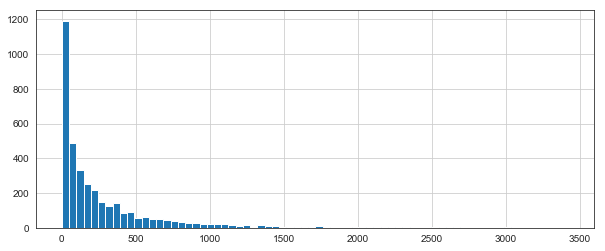

In [12]:
plt.figure(figsize = (10,4))
ratings['no. of ratings'].hist(bins = 70)

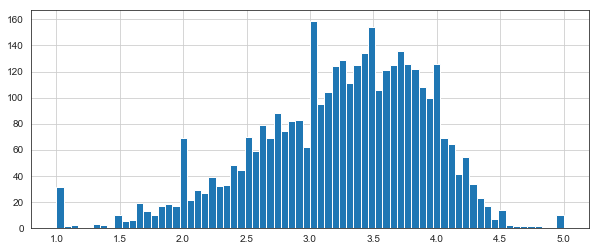

In [13]:
plt.figure(figsize = (10,4))
ratings['Rating'].hist(bins = 70)   

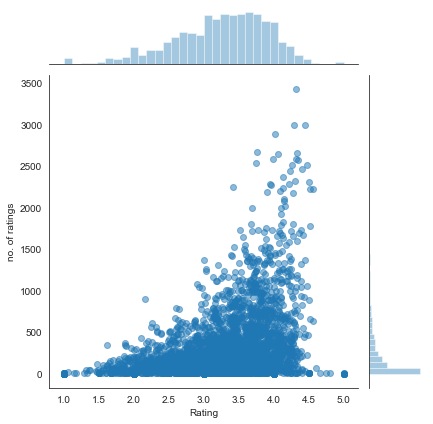

In [14]:
sns.jointplot(x='Rating',y='no. of ratings',data=ratings,alpha=0.5)

# Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [15]:
moviemat = df.pivot_table(index = 'UserID', columns = 'Title', values = 'Rating')
moviemat.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [16]:
ratings.sort_values('no. of ratings', ascending = False).head()

,Rating,no. of ratings
Title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672


In [17]:
#import warnings
#warnings.filterwarnings("ignore")

# User input (Movie Name)

In [24]:
pd.set_option('display.max_rows', 4000)
print(movie_titles.Title)

# Define a function having (m) as a Parameter
def fun1(m):
    m_user_ratings = moviemat[m]
    similar_to_m = moviemat.corrwith(m_user_ratings)
    
#   We can use corrwith() method to get correlations between two pandas series:
#   Removing NaN values and using a DataFrame instead of a series:
    corr_m = pd.DataFrame(similar_to_m, columns = ['Correlation'])
    corr_m.dropna(inplace = True)
    
#   Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users.    
    corr_m.sort_values('Correlation',ascending = False).head()
    corr_m = corr_m.join(ratings['no. of ratings'])
    
#   Filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier) & sort the values.
    mn=corr_m[corr_m['no. of ratings']>100].sort_values('Correlation',ascending = False).head()
#   Printing Movie Name
    print("___________________________________________________________ ")
    print('THIS RECOMMMENDER SYSTEM RECOMMENDS YOU TO WATCH THIS MOVIE')
    print(" ")
    mn = mn.drop(['Correlation'], axis=1)
#    mn = mn.drop(['no. of ratings'], axis=1)
    print(mn.iloc[[1]])
#    print(mn)
    

# Now We Are Creating Search History Database:
    
def fun2():
    a=str(input('Enter Movie Name : '))
    fun1(a)
    print(" ")
    print('AFTER WATCHING',a)
    print("___________________________________________________________ ")
    print(' ')
    fin=open('search history database.txt','a')
    x=str(a)
    fin.write(x)
    fin.write(" \n")
#    fin.write("  /  ")
    fin.close()
fun2()


0                                        Toy Story (1995)
1                                          Jumanji (1995)
2                                 Grumpier Old Men (1995)
3                                Waiting to Exhale (1995)
4                      Father of the Bride Part II (1995)
5                                             Heat (1995)
6                                          Sabrina (1995)
7                                     Tom and Huck (1995)
8                                     Sudden Death (1995)
9                                        GoldenEye (1995)
10                         American President, The (1995)
11                     Dracula: Dead and Loving It (1995)
12                                           Balto (1995)
13                                           Nixon (1995)
14                                Cutthroat Island (1995)
15                                          Casino (1995)
16                           Sense and Sensibility (1995)
17            

Enter Movie Name : Star Wars: Episode I - The Phantom Menace (1999)
___________________________________________________________ 
THIS RECOMMMENDER SYSTEM RECOMMENDS YOU TO WATCH THIS MOVIE
 
                                                   no. of ratings
Title                                                            
Star Wars: Episode VI - Return of the Jedi (1983)            2883
 
AFTER WATCHING Star Wars: Episode I - The Phantom Menace (1999)
___________________________________________________________ 
 
